<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [2]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [39]:
jobs = pd.read_csv('https://raw.githubusercontent.com/PeggyK1/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv')
print(jobs.shape)
jobs.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [40]:
from bs4 import BeautifulSoup
import requests

def bty_soup(src):
    soup = BeautifulSoup(src[2:-1], 'html.parser')
    return (soup.text.lower()
            .replace(':', ' ')
            .replace('\\n', ' ')
            .replace('\\', ' ')
            .replace(', ', ' ')
            .replace('/', ' ')
            .lower()
           )

In [41]:
def clean(s):
    return re.sub(r'[^a-z]', ' ', s.lower())

In [42]:
jobs = jobs.drop(columns=['Unnamed: 0'])
jobs = jobs[['title', 'description']]
jobs['description']=jobs['description'].apply(bty_soup)
jobs['description']

0      job requirements  conceptual understanding in ...
1      job description  as a data scientist 1 you wil...
2      as a data scientist you will be working on con...
3      $4,969 - $6,756 a monthcontractunder the gener...
4      location  usa  xe2 x80 x93 multiple locations ...
                             ...                        
421    about us  want to be part of a fantastic and f...
422    internshipat uber we ignite opportunity by set...
423    $200,000 - $350,000 a yeara million people a y...
424    senior data scientist job description  about u...
425    cerner intelligence is a new innovative organi...
Name: description, Length: 426, dtype: object

In [43]:
jobs.head()

,title,description
0,Data scientist,job requirements conceptual understanding in ...
1,Data Scientist I,job description as a data scientist 1 you wil...
2,Data Scientist - Entry Level,as a data scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthcontractunder the gener..."
4,Data Scientist,location usa xe2 x80 x93 multiple locations ...


In [44]:
jobs['description'] = jobs['description'].apply(clean)
jobs['description'].head()

0    job requirements  conceptual understanding in ...
1    job description  as a data scientist   you wil...
2    as a data scientist you will be working on con...
3                    a monthcontractunder the gener...
4    location  usa  xe  x   x   multiple locations ...
Name: description, dtype: object

## 2) Use Spacy to tokenize the listings 

In [45]:
# Tokenize Function
import re
def tokenize(text):
    tokens = re.sub('[^a-z]', ' ', text)
    tokens = tokens.split()
    
    return tokens

In [46]:
jobs['tokens'] = jobs['description'].apply(tokenize)

In [47]:
jobs['tokens'].head()

0    [job, requirements, conceptual, understanding,...
1    [job, description, as, a, data, scientist, you...
2    [as, a, data, scientist, you, will, be, workin...
3    [a, monthcontractunder, the, general, supervis...
4    [location, usa, xe, x, x, multiple, locations,...
Name: tokens, dtype: object

In [48]:
# En Core Web Lg
import en_core_web_lg
nlp = en_core_web_lg.load()

In [49]:
# Remove Stop Words
tokens = []

for doc in nlp.pipe(jobs['description'], batch_size=500):
    doc_tokens=[]
    
    for token in doc:
        if (token.is_stop == False)&(token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)

jobs['tokens'] = tokens

In [50]:
jobs['tokens'].head()

0    [job, requirements,  , conceptual, understandi...
1    [job, description,  , data, scientist,   , hel...
2    [data, scientist, working, consulting, busines...
3    [                , monthcontractunder, general...
4    [location,  , usa,  , xe,  , x,   , x,   , mul...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [58]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer



# Create Transformer
vect = CountVectorizer(stop_words='english', max_features=1000)

# Build Vocab
vect.fit(jobs)

# Transform Text
dtm = vect.transform(jobs)

In [55]:
print(dtm)

  (0, 1)	1
  (1, 0)	1
  (2, 2)	1


In [56]:
# Get Word Count for Each Document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,description,title,tokens
0,0,1,0
1,1,0,0
2,0,0,1


## 4) Visualize the most common word counts

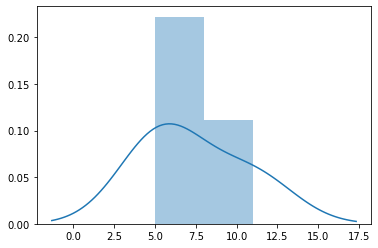

In [61]:
import seaborn as sns

doc_len = [len(doc) for doc in jobs]
sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [65]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

dtm = tfidf.fit_transform(jobs)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Matrix
dtm.head()

,description,title,tokens
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [66]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree')

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 